In [9]:
from bubbles import *
from utils_visualisation import *
import numpy as np

Choose the directory of images from one particular experiement, and set their BVF value.

In [2]:
directory_name = 'data/05.17_0.37/'

images, file_names = import_photos(directory_name)
bvf = 0.44

Set the size of the largest bubble you'd like to search for, where the diameter is measured in pixels. Use the plot below for reference to help set the size: the image is selected at random so run the cell multiple times to make sure you've got the right size.

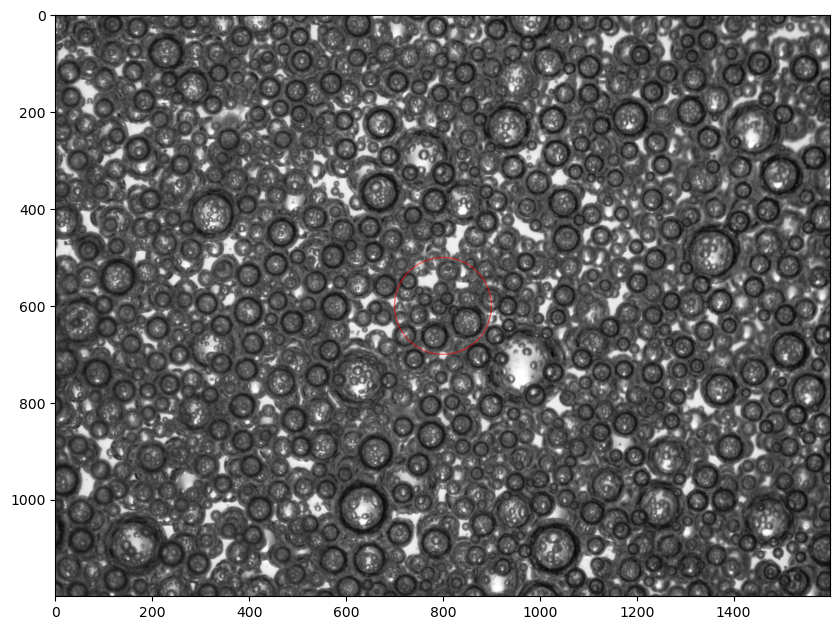

In [3]:
max_diameter = 100

n = np.random.randint(images.shape[0])
plot_bubbles_on_image(images[n], np.array([[images.shape[1]/2, images.shape[2]/2, max_diameter]]))

Now set the radius sampling rate and bubble threshold.

Radius sampling rate: \
1 -> every radius is analysed, which is slower but more precise. \
r -> every r radius is analysed, which is faster to compute. \
\
Bubble threshold: \
0 -> will work for most cases \
lower e.g. -0.01 -> will accept more bubbles but risk more false positives \
higher e.g. 0.01 -> will accept fewer bubbles so risk more false negatives.

Finding bubble centres
Computing bubble 200 of 761
Computing bubble 400 of 761
Computing bubble 600 of 761
Done


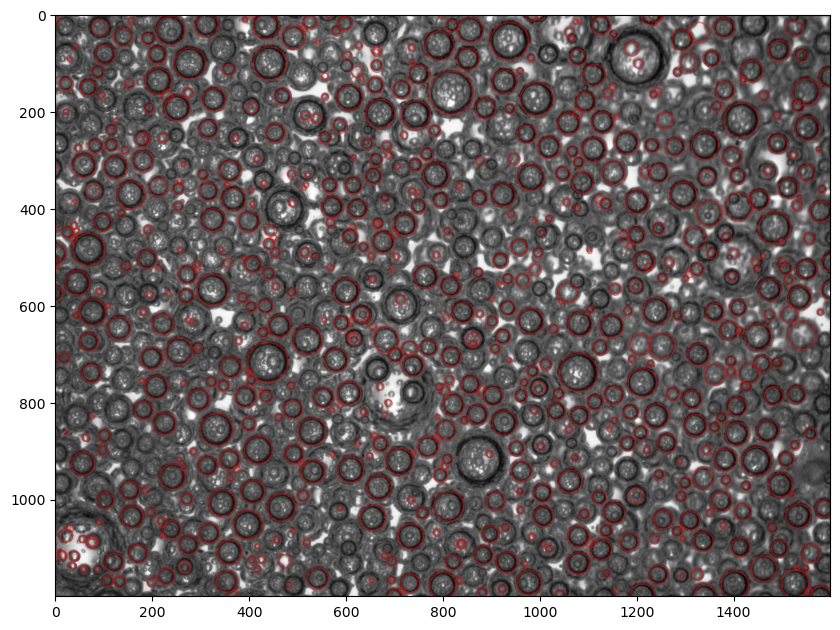

In [11]:
radius_sampling_rate = 5
bubble_threshold = -0.015

parameters['sampling_params'] = [10, max_diameter, radius_sampling_rate]
parameters['constellation_threshold'] = bubble_threshold
n = np.random.randint(images.shape[0])
bubbles = bubbles_from_image(images[n], parameters, bvf)
plot_bubbles_on_image(images[n], bubbles)

Finally, adjust the bubble scale factor. This should be 1 for most examples, but for certain of the low BVF images you will want to increase it to 1.2 or so. This is because the bubble radius is underestimated for bubbles with a thick boundary circle.

If you'd like to see this computed for a different image in the directory, re-run the previous cell to randomly select a new image.

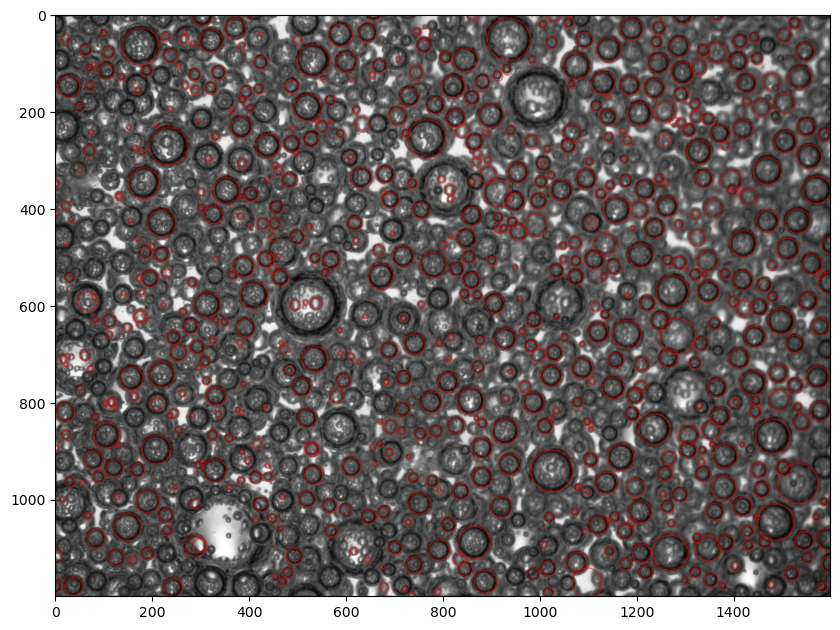

In [5]:
bubble_scale_factor = 1

parameters['bubble_scale_factor'] = bubble_scale_factor
plot_bubbles_on_image(images[n], bubbles * np.array([1,1,bubble_scale_factor]))

Now run the process for the whole directory of images.

In [ ]:
centres_data = [bubbles_from_image(image, parameters, bvf) for image in images]

Now save the data.

In [ ]:
np.save('bubble_data/' + directory_name.split('_')[-1].removesuffix('/'),
        np.array([file_names, centres_data], dtype=object))